In [1]:
import numpy as np
from osgeo import gdal, gdalconst
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
def get_dataSG(fname):
    gdal.UseExceptions()
    ds = gdal.Open(fname)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    
    xres = gt[1]
    yres = gt[5]
    xmin = gt[0]
    ymin = gt[3]
    
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)

    
    xmax = gt[0] + (xres * ds.RasterXSize) 
    ymax = gt[3] + (yres * ds.RasterYSize) 

    X=np.arange(xmin+xres,xmax+xres,xres) 
    Y=np.arange(ymin+yres,ymax+yres,yres) 


    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y
    LON=X
    D=data
    
    return (LAT,LON,D)

In [3]:
def get_tifff_data(fn,mask,latmax,latmin,lonmax,lonmin):
    ds = gdal.Open(fn)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
    #    else:
    #        xmax = gt[0] + (xres * ds.RasterXSize) 
    #        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin,xmax-xres/2,xres)
    Y=np.arange(ymin,ymax-yres/2,yres)
        #Chunck the data to save RAM for plotting
    #Ydecreasing
    b=np.min(np.where(Y<latmin)[0])
    a=np.max(np.where(Y>latmax)[0])

    c=np.max(np.where(X<lonmin)[0])
    d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y[a:b]
    LON=X[c:d]
    D=data[a:b,c:d]

    Dm=D.astype(float)
    #Xg,Yg=np.meshgrid(LON,LAT)
    #DM=np.ma.masked_where(Dm==mask,Dm)
    DM=Dm
    return(DM,LAT,LON)

In [4]:
fnDSM='/mnt/g/BlueskyDSM/1m_CHMWGS84.tif'
(LATs,LONs,DSM)=get_dataSG(fnDSM)

In [5]:
DSMm=np.ma.masked_where(DSM==-9999.0,DSM)

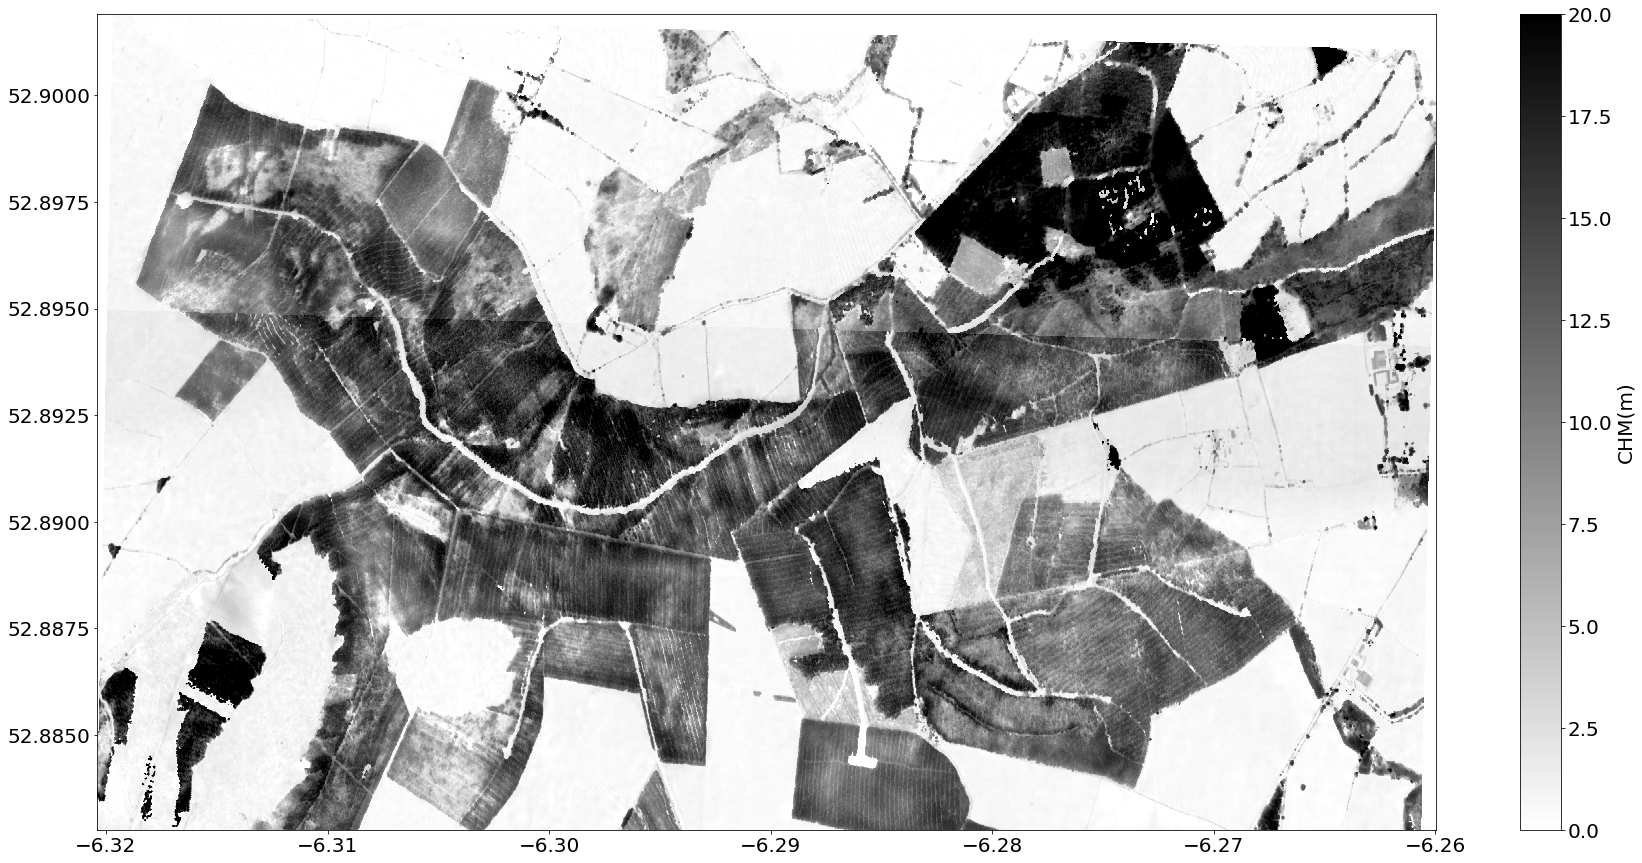

In [6]:
fig, axs = plt.subplots(1, 1,figsize=(30, 15))
ax1=axs
LONg, LATg = np.meshgrid(LONs, LATs)
c=ax1.pcolormesh(LONg, LATg, DSMm,cmap='gray_r',vmin=0,vmax=20)
cb=plt.colorbar(c, ax=ax1,extendfrac='auto', spacing='proportional')   
cb.ax.tick_params(labelsize=15)
ax1.set_ylim(np.min(LATg[DSMm.mask==False]),np.max(LATg[DSMm.mask==False]))
ax1.set_xlim(np.min(LONg[DSMm.mask==False]),np.max(LONg[DSMm.mask==False]))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
cb.set_label('CHM(m)', fontsize=20)
cb.ax.set_yticklabels(cb.ax.get_yticks(),fontsize=20)
fig.savefig('CHM_bluesky.png')

In [7]:
latmax=np.max(LATg[DSMm.mask==False])
latmin=np.min(LATg[DSMm.mask==False])
lonmax=np.max(LONg[DSMm.mask==False])
lonmin=np.min(LONg[DSMm.mask==False])
fn='/mnt/g/Tree_height/Simard_Pinto_3DGlobalVeg_JGR.tif'
HC,LAT,LON=get_tifff_data(fn,0,latmax,latmin,lonmax,lonmin)

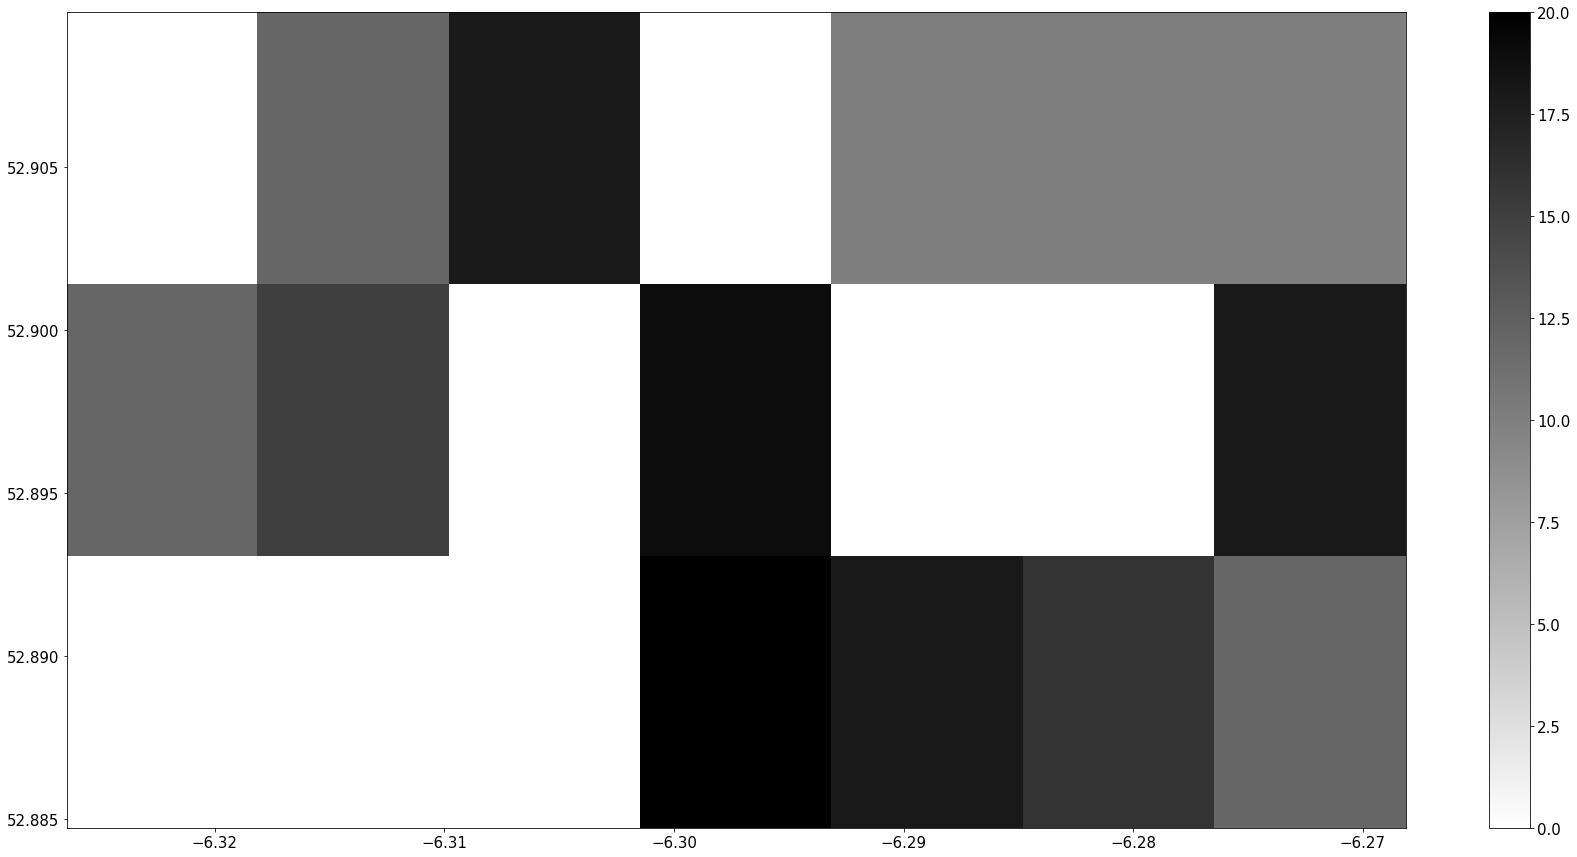

In [8]:
fig, axs = plt.subplots(1, 1,figsize=(30, 15))
ax1=axs
LONg, LATg = np.meshgrid(LON, LAT)
c=ax1.pcolormesh(LONg, LATg, HC,cmap='gray_r',vmin=0,vmax=20)
cb=plt.colorbar(c, ax=ax1,extendfrac='auto', spacing='proportional')   
cb.ax.tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
fig.savefig('Simard_area_chm.png')
#ax1.set_ylim(np.min(LATg[DSMm.mask==False]),np.max(LATg[DSMm.mask==False]))
#ax1.set_xlim(np.min(LONg[DSMm.mask==False]),np.max(LONg[DSMm.mask==False]))